In [1]:
from imodelsx import TreePromptClassifier
import datasets
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Prompt 0: This movie is


Prompt 1:  Positive or Negative? The movie was


Prompt 2:  The sentiment of the movie was


Prompt 3:  The plot of the movie was really


Prompt 4:  The acting in the movie was


Prompt 0: This movie is


Prompt 1:  The plot of the movie was really



Tree-Prompt acc (val) -> 0.7
0 This movie is -> 0.65
1  Positive or Negative? The movie was -> 0.5
2  The sentiment of the movie was -> 0.5
3  The plot of the movie was really -> 0.56
4  The acting in the movie was -> 0.51


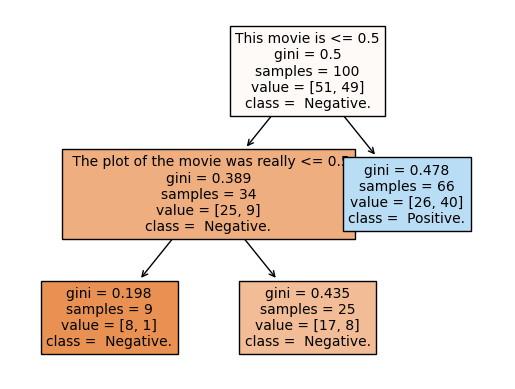

In [2]:
# set up data
rng = np.random.default_rng(seed=42)
dset_train = datasets.load_dataset('rotten_tomatoes')['train']
dset_train = dset_train.select(rng.choice(
    len(dset_train), size=100, replace=False))
dset_val = datasets.load_dataset('rotten_tomatoes')['validation']
dset_val = dset_val.select(rng.choice(
    len(dset_val), size=100, replace=False))

# set up arguments
prompts = [
    "This movie is",
    " Positive or Negative? The movie was",
    " The sentiment of the movie was",
    " The plot of the movie was really",
    " The acting in the movie was",
]
verbalizer = {0: " Negative.", 1: " Positive."}
checkpoint = "gpt2"

# fit model
m = TreePromptClassifier(
    checkpoint=checkpoint,
    prompts=prompts,
    verbalizer=verbalizer,
    cache_prompt_features_dir=None,  # 'cache_prompt_features_dir/gp2',
)
m.fit(dset_train["text"], dset_train["label"])


# compute accuracy
preds = m.predict(dset_val['text'])
print('\nTree-Prompt acc (val) ->',
      np.mean(preds == dset_val['label']))  # -> 0.7

# compare to accuracy for individual prompts
for i, prompt in enumerate(prompts):
    print(i, prompt, '->', m.prompt_accs_[i])  # -> 0.65, 0.5, 0.5, 0.56, 0.51

# visualize decision tree
plot_tree(
    m.clf_,
    fontsize=10,
    feature_names=m.feature_names_,
    class_names=list(verbalizer.values()),
    filled=True,
)
plt.show()